<a href="https://colab.research.google.com/github/chidroop23/AI-ML/blob/main/Chidroop_Sagar_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XGBoost Classifier for Classic Salary Prediction**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier

In [2]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
             "Hours per week", "Country", "Target"]

train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=features, sep=r'\s*,\s*',
                    engine='python', na_values="?", skiprows=1 )
test_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=features, sep=r'\s*,\s*',
                    engine='python', na_values="?", skiprows=1)



In [3]:
train_set.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
test_set.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


# **EDA**

In [5]:
train_set.shape


(32560, 15)

In [6]:
test_set.shape

(16281, 15)

In [7]:
train_set.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Checking for Null values**

In [8]:
print(train_set.isnull().sum())

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64


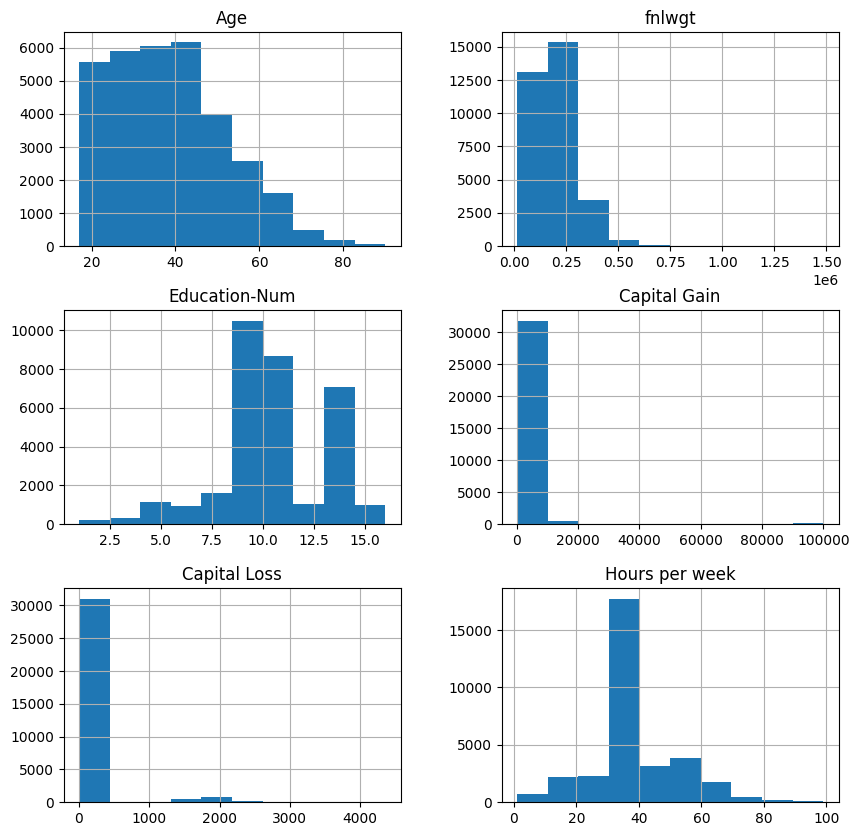

In [9]:
train_set.hist(figsize=(10,10))
plt.show()

In [10]:
train_set.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target            object
dtype: object

In [11]:
for feature in features:
    if train_set[feature].dtype == 'object':

        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())


__________ Workclass __________
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
__________ Education __________
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64
__________ Martial Status __________
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Martial Status, dtype: int64
__________ Occupation _____

In [12]:
import re
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)

In [13]:
train_set.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [14]:
test_set.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education-Num       0
Martial Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per week      0
Country           274
Target              0
dtype: int64

In [15]:
mode_values = test_set[['Workclass', 'Occupation', 'Country']].mode().iloc[0]

# Fill missing values with the mode for each column
test_set['Workclass'].fillna(mode_values['Workclass'], inplace=True)
test_set['Occupation'].fillna(mode_values['Occupation'], inplace=True)
test_set['Country'].fillna(mode_values['Country'], inplace=True)


In [16]:
test_set.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [17]:
train_set.Target.value_counts()

<=50K    24719
>50K      7841
Name: Target, dtype: int64

**Applying One Hot Encoding**

In [18]:
df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)


df1=pd.get_dummies(df1[objectFeature[:-1]])

In [19]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [20]:
print(df1.shape)
print(df2.shape)

(32560, 99)
(32560, 6)


**Concatinating the two frames**

In [21]:
X_train = pd.concat([df1, df2], axis=1)

In [22]:
X_train.shape

(32560, 105)

In [23]:
y=train_set[objectFeature[-1]]

**LabelEncoder over the target variable**

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_train=le.fit_transform(y)

In [25]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

## **Applying XGB**

In [26]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [28]:
x_train, x_test, y_t1, y_t2 =train_test_split(X_train, y_train, test_size=.25)

In [29]:
x_train.shape, x_test.shape, y_t1.shape, y_t2.shape

((24420, 105), (8140, 105), (24420,), (8140,))

In [30]:
xgb = XGBClassifier(**params).fit(x_train,y_t1)

[02:02:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [31]:
y_pred= xgb.predict(x_test)

In [32]:
accuracy_score(y_t2, y_pred)

0.871007371007371

**Test Set**

In [35]:
eval_set = [(x_train, y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train, y_t1,
                                   early_stopping_rounds=15,
                                   eval_metric=["error", "logloss"],
                                   eval_set=eval_set,
                                   verbose=True)

[02:04:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-error:0.17039	validation_0-logloss:0.50170	validation_1-error:0.17592	validation_1-logloss:0.50530
[1]	validation_0-error:0.15463	validation_0-logloss:0.42750	validation_1-error:0.16106	validation_1-logloss:0.43395
[2]	validation_0-error:0.15459	validation_0-logloss:0.39290	validation_1-error:0.16057	validation_1-logloss:0.40122
[3]	validation_0-error:0.15156	validation_0-logloss:0.36930	validation_1-error:0.15553	validation_1-logloss:0.37736
[4]	validation_0-error:0.14816	validation_0-logloss:0.35434	validation_1-error:0.15209	validation_1-logloss:0.36304
[5]	validation_0-error:0.14930	validation_0-logloss:0.34383	validation_1-error:0.15307	validation_1-logloss:0.35335
[6]	validation_0-error:0.14865	validation_0-logloss:0.33635	validation_1-error:0.15209	validation_1-logloss:0.34623
[7]	validation_0-error:0.14672	validation_0-logloss:0.33001	validation_1-error:0.14865	validation_1-logl

In [36]:
y_pred1=xgb1.predict(x_test)

In [37]:
accuracy_score(y_t2, y_pred1)

0.8707616707616708

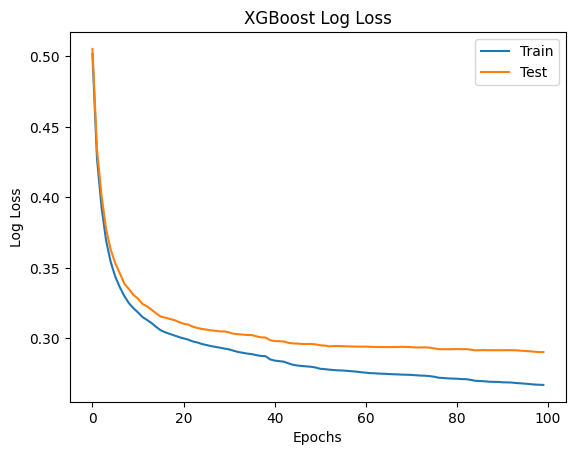

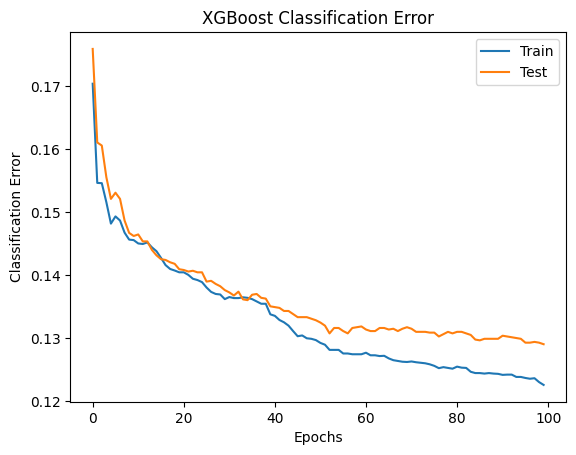

In [38]:
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

**Different method**

In [40]:
#Import Xgboost
import xgboost as xgb

In [41]:
dtrain = xgb.DMatrix(x_train, label = y_t1)
dtest = xgb.DMatrix(x_test, label = y_t2)

In [42]:
#creating watchlist of training
# to see out output
watchlist = [(dtrain,'train'),(dtest, 'eval')]

In [43]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}
# using bydeafault eta [default=0.3, alias: learning_rate]

num_rounds = 100

In [44]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)

[02:07:46] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.90581	eval-auc:0.89774
[1]	train-auc:0.92080	eval-auc:0.90904
[2]	train-auc:0.92671	eval-auc:0.91468
[3]	train-auc:0.93034	eval-auc:0.91441
[4]	train-auc:0.93479	eval-auc:0.91781
[5]	train-auc:0.93835	eval-auc:0.91943
[6]	train-auc:0.94142	eval-auc:0.92135
[7]	train-auc:0.94296	eval-auc:0.92128
[8]	train-auc:0.94669	eval-auc:0.91876
[9]	train-auc:0.94821	eval-auc:0.91875
[10]	train-auc:0.94902	eval-auc:0.91964
[11]	train-auc:0.94980	eval-auc:0.91956
[12]	train-auc:0.95174	eval-auc:0.91885
[13]	train-auc:0.95471	eval-auc:0.91788
[14]	train-auc:0.95599	eval-auc:0.91746
[15]	train-auc:0.95731	eval-auc:0.91719
[16]	train-auc:0.95790	eval-auc:0.91695
[17]	train-auc:0.95974	eval-auc:0.91589
[18]	train-auc:0.96114	eval-auc:0.91611
[19]	train-auc:0.96210	eval-auc:0.91556
[20]	train-auc:0.96245	eval-auc:0.91582
[21]	train-auc:0.96284	eval-auc:0.91510


In [46]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)

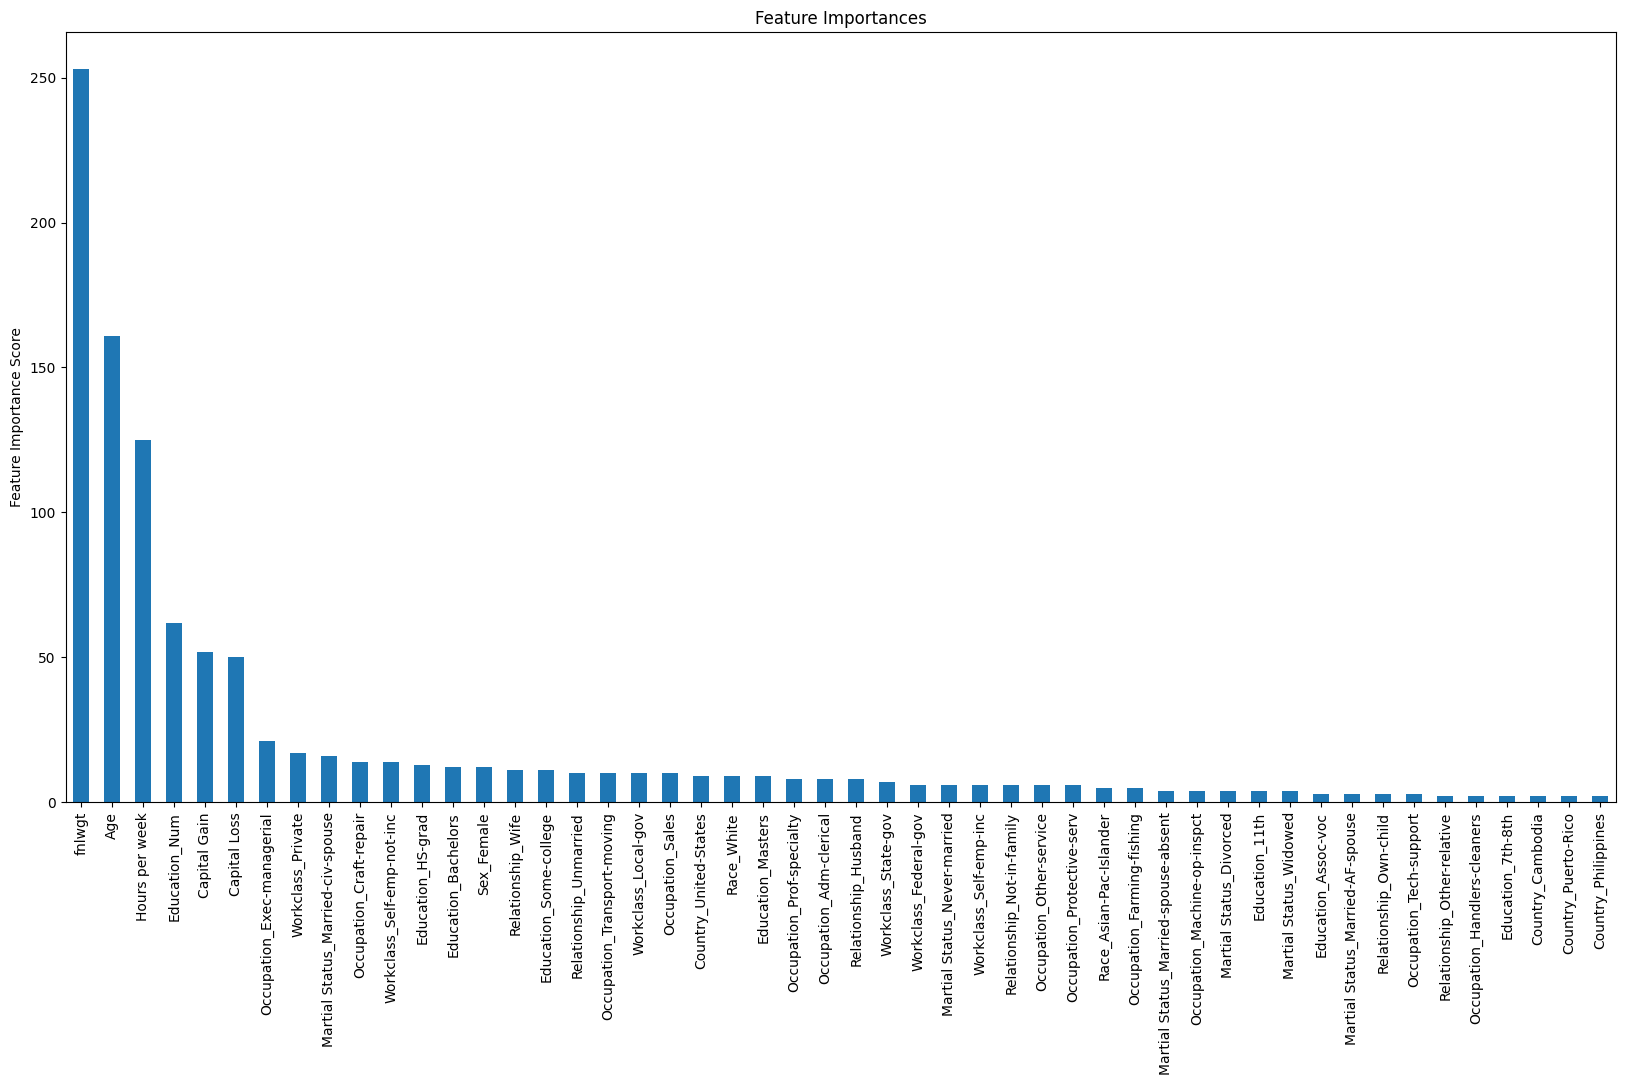

In [47]:
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()

**Reference**

*1) https://github.com/speedhot/assignment_ML6_xgboost/blob/master/assignment_ML6_xgboost.ipynb*